## Importar librerías

In [2]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [3]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [4]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(# Janitor
        case_type = "snake"
    )
)

nhanes_raw_df.shape

(8366, 197)

## Procesar los datos de NHANES

In [5]:
nhanes_df = (
    nhanes_raw_df.select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    .rename_columns(
        {
            "age_in_years_at_screening": "age",
            "current_selfreported_height_inches": "height",
            "current_selfreported_weight_pounds": "weight",
            "doctor_told_you_have_diabetes": "diabetes",
            "60_sec_pulse30_sec_pulse2": "pulse",
            "total_cholesterol_mgdl": "total_cholesterol"
        }
    )
    .replace(
        {
            "height": {
                9999: np.nan,
                7777: np.nan
            },
            "weight": {
                9999: np.nan,
                7777: np.nan
            },
            "diabetes": {
                "Borderline": np.nan
            }
        }
    )
    .missing.sort_variables_by_missingness()
    .dropna(
        subset = ["diabetes"],
        how = "any"
    )
    .transform_column(#Esta función es de janitor
        column_name = "diabetes",
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

nhanes_df.shape

(8187, 8)

## Visualizar los valores faltantes

<AxesSubplot:>

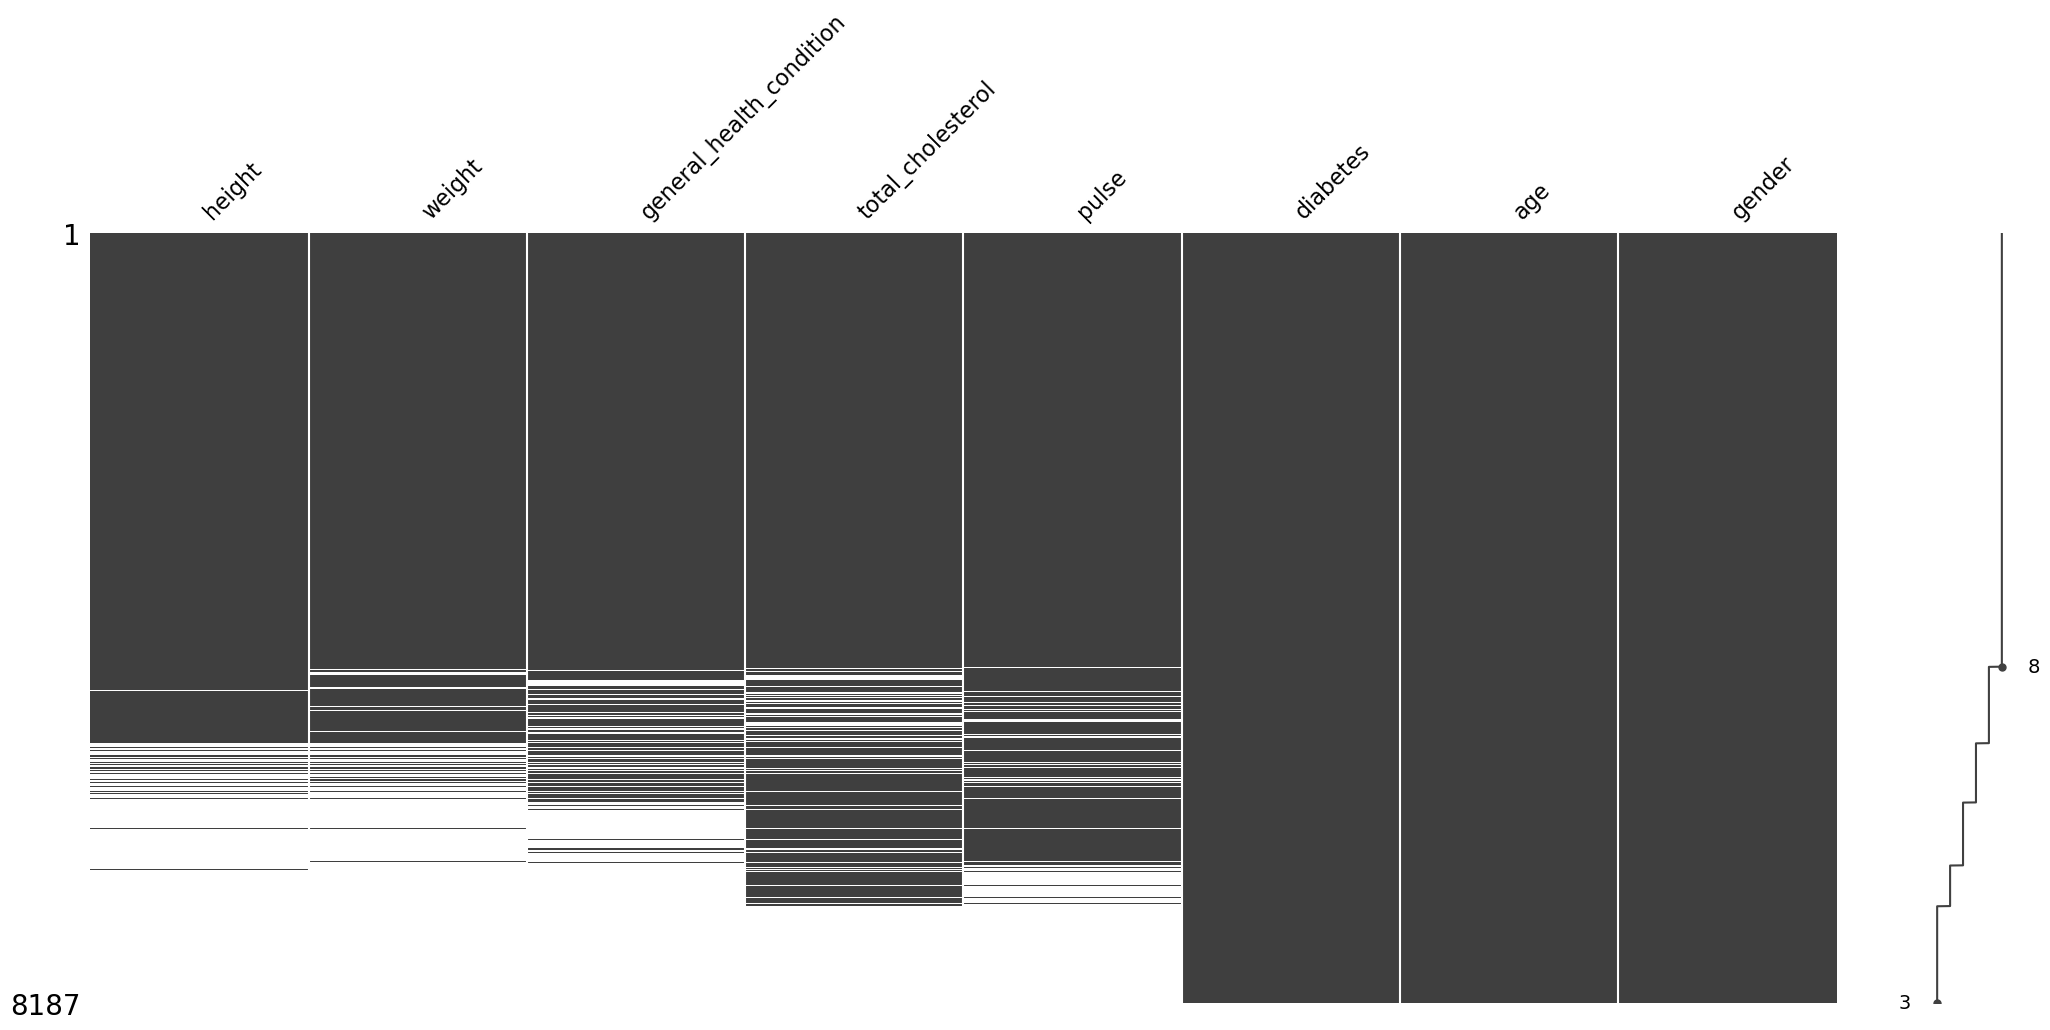

In [9]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

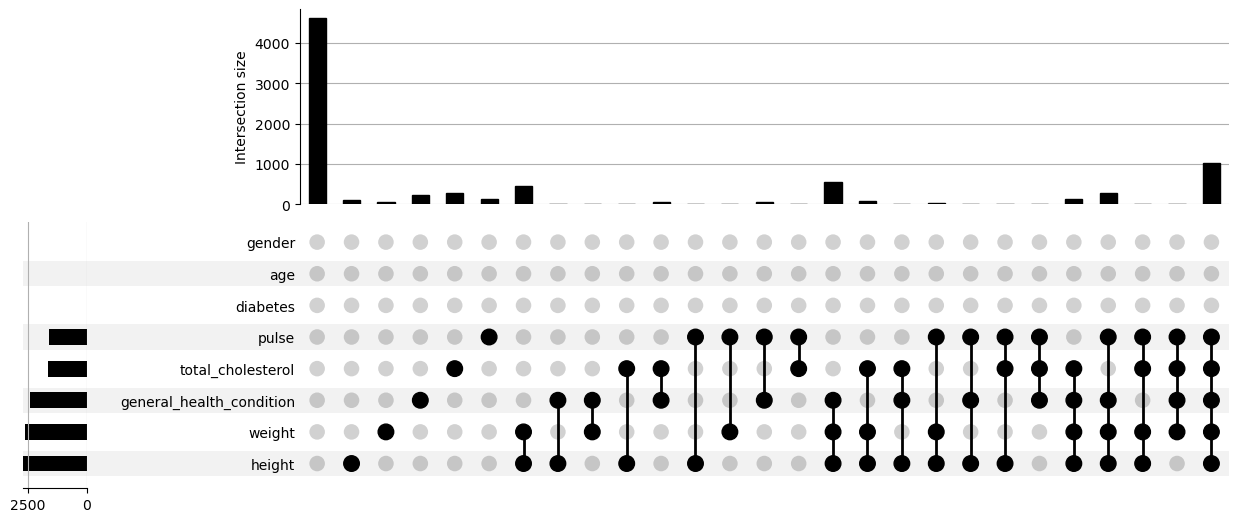

In [10]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<AxesSubplot:>

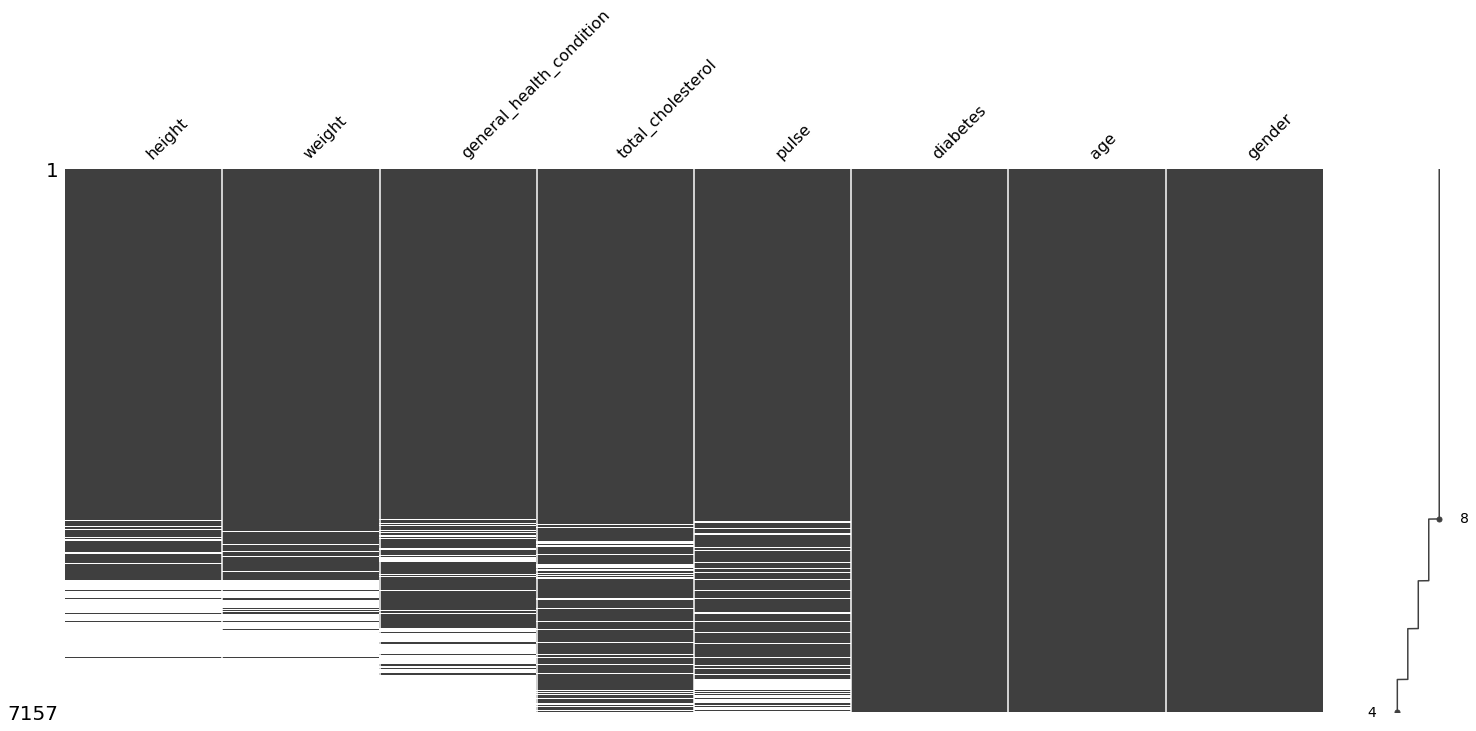

In [ ]:
(
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height"],
        how = "all" #all sirve para eliminar todos las filas si hay un valor faltante en  las columnas declaradas en el subset
    )
    .missing.sort_variables_by_missingness()
    .pipe(lambda df: missingno.matrix(df, sort="descending"))
)

## Eliminar valores faltantes

In [ ]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height"],
        how = "all"
    )
)

nhanes_df.shape

(7157, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>